# Projeto 2 - Ciência dos dados

### Integrantes :

* Camila Magni 
* Gustavo Borba
* Julia Figueiredo
* Lincoln Rodrigo

## Introdução

![musica](musica.jpg)

Atualmente a música tem um grande impacto na vida das pessoas, estando presente no cotidiano de uma parcela considerável da população. Sendo assim, resolvemos analisar uma base de dados denominada de "Previsão do gênero musical” para atingir o objetivo proposto para o Projeto 2, que era prever uma variável principal em função de demais outras variáveis que podem influenciar em seu comportamento. A base de dados foi obtida na plataforma Kaggle e possui um conjunto de informações fornecidas pelo Spotify. Considerando algumas características de cada música, queremos prever qual será sua popularidade entre os ouvintes. Além disso, tendo em vista que o mercado musical está em constantes transformações, pretendemos responder o seguinte questionamento: como a duração de uma música influencia na popularidade da mesma?

Para isso, definimos como Target a variável quantitativa 'popularity' (variável principal e dependente), e como Features, as demais variáveis quantitativas independentes:'danceability', 'energy', 'liveness', 'loudness', 'speechiness', 'duration_s', 'valence'.

In [2]:
# Importando as bibliotecas que serão utilizadas no projeto

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import numpy as np
import statsmodels.api as sm
import seaborn as sns

### Limpeza da base de dados :


Com a finalidade de obter resultados mais concisos e diminuir o número de registros, realizamos uma limpeza inicial removendo algumas variáveis "indesejáveis", que não condizem com o objetivo do projeto.

Por isso usamos a função `drop` para retirar do data frame as colunas: 'instance_id', 'key', 'acousticness', 'mode', 'instrumentalness' e 'obtained_date'. De forma que passamos de 18 colunas para 12.

In [3]:
dados = pd.read_csv('music_genre.csv') # Realizando a leitura do dataframe
dados.head(3)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.7920,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.9500,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.0118,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic


In [4]:
# Removendo variáveis que não interessam
dados = dados.drop(['instance_id','key','acousticness','mode','instrumentalness','obtained_date', 'tempo'], axis=1)
dados.head(3)

,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,speechiness,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.652,-1.0,0.941,0.115,-5.201,0.0748,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.622,218293.0,0.890,0.124,-7.043,0.0300,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.620,215613.0,0.755,0.534,-4.617,0.0345,0.333,Electronic


Em seguida, transformamos a coluna que contém a duração de cada música de milissegundos para segundos, para facilitar a interpretação dos seus valores.

In [5]:
# Modificando a coluna 'duration_ms' de milisegundos para segundos:
dados['duration_s']= dados.duration_ms/1000
dados = dados.drop(['duration_ms'], axis=1)
dados.head(3)

,artist_name,track_name,popularity,danceability,energy,liveness,loudness,speechiness,valence,music_genre,duration_s
0,Röyksopp,Röyksopp's Night Out,27.0,0.652,0.941,0.115,-5.201,0.0748,0.759,Electronic,-0.001
1,Thievery Corporation,The Shining Path,31.0,0.622,0.890,0.124,-7.043,0.0300,0.531,Electronic,218.293
2,Dillon Francis,Hurricane,28.0,0.620,0.755,0.534,-4.617,0.0345,0.333,Electronic,215.613


#### Descrição da base de dados

Antes de prosseguir, vamos definir o que cada coluna do dataframe significa:

- **artist_name**: nome do artista
- **track_name**: nome da música
- **popularity**: popularidade
- **danceability**: daceabilidade
- **energy**: energia
- **liveness**: vivacidade
- **loudness**: volume (nível de ruído)
- **speechiness**: facilidade para fala
- **valence**: valencia
- **music_genre**: gênero musical ('Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical' e 'Hip-Hop') 
- **duration_s**: duração da música em segundos.


## Análise Exploratória do Data Frame:

Após as manipulações realizadas na base de dados, iniciamos a análise exploratória de suas variáveis a fim de entender suas características, valores e correlações existentes.

Primeiramente, utilizamos a função `.dtypes` para analisar os tipos de variável de cada coluna. Percebemos que todas as colunas do data frame já estão classificadas como desejamos, sendo “artist_name”, “track_name” e “music_genre”
as únicas variáveis qualitativas.


In [6]:
dados.dtypes # Verificando os tipos de cada variável do dataframe

artist_name      object
track_name       object
popularity      float64
danceability    float64
energy          float64
liveness        float64
loudness        float64
speechiness     float64
valence         float64
music_genre      object
duration_s      float64
dtype: object

#### Medidas resumo

Então, foi utilizado o comando `describe()` para gerar estatísticas descritivas da base, incluindo tendência central, média, desvio-padrão (dispersão) e forma da distribuição.

In [6]:
dados.describe()

,popularity,danceability,energy,liveness,loudness,speechiness,valence,duration_s
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.558241,0.599755,0.193896,-9.133761,0.093586,0.456264,221.252603
std,15.542008,0.178632,0.264559,0.161637,6.162990,0.101373,0.247119,128.671957
min,0.000000,0.059600,0.000792,0.009670,-47.046000,0.022300,0.000000,-0.001000
25%,34.000000,0.442000,0.433000,0.096900,-10.860000,0.036100,0.257000,174.800000
50%,45.000000,0.568000,0.643000,0.126000,-7.276500,0.048900,0.448000,219.281000
75%,56.000000,0.687000,0.815000,0.244000,-5.173000,0.098525,0.648000,268.612250
max,99.000000,0.986000,0.999000,1.000000,3.744000,0.942000,0.992000,4830.606000


Nota-se que a coluna principal "popularity" possui valores de 0 a 99, sendo a média (44.22) bem próxima a mediana (45), indicando uma possível distribuição simétrica.

#### Correlações entre variável Target (popularidade) e variáveis Features

Com a finalidade de estudar as relações entre cada uma das variáveis quantitativas da base de dados, calculamos suas respectivas correlações, e em seguida, fizemos gráficos de dispersão para cada uma delas.

In [7]:
dicionario = {'Corr': [dados['popularity'].corr(dados['danceability']), dados['popularity'].corr(dados['energy']),dados['popularity'].corr(dados['liveness']),dados['popularity'].corr(dados['loudness']),
dados['popularity'].corr(dados['speechiness']),dados['popularity'].corr(dados['duration_s']),dados['popularity'].corr(dados['valence'])]}

correlacoes = pd.DataFrame(dicionario, index=["danceability","energy","liveness","loudness","speechiness","duration_s","valence"])
correlacoes

,Corr
danceability,0.356420
energy,0.216345
liveness,-0.039468
loudness,0.317941
speechiness,0.224309
duration_s,-0.083809
valence,0.124913


#### Gráficos de dispersão - Target X Features

In [1]:
plt.figure(figsize=(20, 20))

plt.subplot(331)
plt.scatter(dados.danceability, dados.popularity, c='red', alpha=0.4) 
plt.title('Popularidade x Danceabilidade')
plt.xlabel('Danceabilidade ')
plt.ylabel('Popularidade')
plt.grid(True)

plt.subplot(332)
plt.scatter(dados.energy, dados.popularity, c='red', alpha=0.4) 
plt.title('Popularidade x Energia')
plt.xlabel('Energia ')
plt.ylabel('Popularidade')
plt.grid(True)

plt.subplot(333)
plt.scatter(dados.liveness, dados.popularity, c='red', alpha=0.4) 
plt.title('Popularidade x Vivacidade')
plt.xlabel('Vivacidade')
plt.ylabel('Popularidade')
plt.grid(True)

plt.subplot(334)
plt.scatter(dados.loudness, dados.popularity, c='red', alpha=0.4) 
plt.title('Popularidade x Volume')
plt.xlabel('Volume')
plt.ylabel('Popularidade')
plt.grid(True)

plt.subplot(335)
plt.scatter(dados.speechiness, dados.popularity, c='red', alpha=0.4) 
plt.title('Popularidade x Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Popularidade')
plt.grid(True)

plt.subplot(336)
plt.scatter(dados.duration_s, dados.popularity, c='red', alpha=0.4) 
plt.title('Popularidade x Duração')
plt.xlabel('Duração')
plt.ylabel('Popularidade')
plt.xlim([0,1500])
plt.grid(True)

plt.subplot(337)
plt.scatter(dados.valence, dados.popularity, c='red', alpha=0.4) 
plt.title('Popularidade x Valencia')
plt.xlabel('Valencia')
plt.ylabel('Popularidade')
plt.grid(True)
plt.show() 

NameError: name 'plt' is not defined

A partir dos gráficos pode-se concluir que a relação entre:

- **Popularidade x Danceabilidade**: relação moderada - quanto maior a danceabilidade, maior a popularidade
- **Popularidade x Energia**: sem relação significante
- **Popularidade x Vivacidade**: sem relação significante
- **Popularidade x Volume**: relação moderada - quanto maior o volume, maior a popularidade
- **Popularidade x Speechiness**: quanto maior o Speechiness, menor a popularidade
- **Popularidade x Duração**: quanto maior a duração de uma música, menor sua popularidade
- **Popularidade x Valencia**: sem relação significante

#### Tabela de Popularidade por Gêneros:

Utilizando a função do pandas `pd.crosstab`, construímos uma tabela que permite analisar a relação entre os gêneros musicais e a popularidade de cada música. Conclui-se que os gêneros mais populares são Rap, Hip Hop e Eletrônico, enquanto que o menos popular é o Clássico.

In [9]:
pd.crosstab(dados['popularity'], dados['music_genre'],normalize=True,margins=True)*100

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock,All
popularity,,,,,,,,,,,
0.0,0.010,0.042,0.062,1.082,0.082,0.054,0.000,0.054,0.000,0.002,1.388
1.0,0.002,0.006,0.006,0.016,0.000,0.000,0.000,0.030,0.000,0.002,0.062
2.0,0.000,0.006,0.004,0.062,0.000,0.000,0.000,0.030,0.000,0.000,0.102
3.0,0.000,0.002,0.006,0.056,0.000,0.002,0.000,0.016,0.000,0.004,0.086
4.0,0.000,0.008,0.006,0.062,0.000,0.000,0.000,0.008,0.000,0.000,0.084
...,...,...,...,...,...,...,...,...,...,...,...
95.0,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.004
96.0,0.000,0.000,0.000,0.000,0.000,0.002,0.002,0.000,0.000,0.000,0.004
97.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.002


#### Histograma de popularidade

Para finalizar nossa análise exploratória da base de dados, construímos um histograma da nossa variável target: a popularidade. Pode-se perceber que a maior concentração de ocorrências está no intervalo de 30 a 60, seguindo uma distribuição quase aparentemente simétrica.

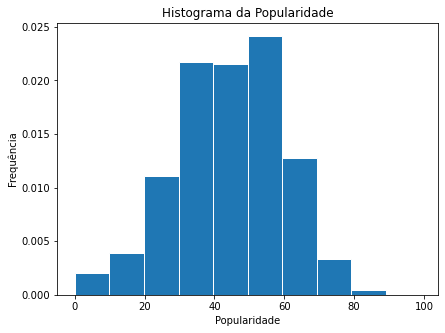

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(dados.popularity, edgecolor='white', density=True)
plt.title('Histograma da Popularidade')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()

## Modelos de Predição

A regressão é uma técnica comum de aprendizado de máquina usada para prever um valor real, como o preço de uma casa com base em um conjunto de características. 

In [11]:
dados = dados.dropna()

In [12]:
# Definindo variáveis features [X] e target [Y]
X = dados[['danceability', 'energy', 'liveness', 'loudness', 'duration_s']]
Y = dados['popularity']

### Regressão Linear Múltipla 

A regressão linear múltipla é um modelo que captura a relação linear entre duas ou mais  variáveis, uma rotulada como variável dependente e as outras rotuladas como variáveis independentes. Existe uma relação linear quando se aumenta ou diminui a variável  independente resultando em um aumento ou diminuição correspondente da variável dependente. Sendo assim uma relação de causa e consequência entre uma variável (target) e as demais (features)

In [13]:
# Função para fazer a regressão com constante adicionada
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [14]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2058.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:13:35   Log-Likelihood:            -2.0344e+05
No. Observations:               50000   AIC:                         4.069e+05
Df Residuals:                   49994   BIC:                         4.070e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.5317      0.541     80.450      0.000      42.471      44.592
danceability    22.4985      0.393     57.293      0.000      21.729      23.268
energy          -5.8704      0.447    -13.137      0.000      -6.746      -4.995
liveness        -4.3914      0.401    -10.949      0.000      -5.177      -3.605
loudness         0.7681      0.020     38.536      0.000       0.729       0.807
duration_s      -0.0022      0.000     -4.379      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      570.193   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.447
Skew:                          -0.265   Prob(JB):                    1.01e-128
Kurtosis:                       2.959   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como o 	P>|t| foi igual a zero para todas as variáveis, pode-se concluir que todas variáveis são relevantes. Dessa forma, partimos para a implementação do modelo de fato.

In [15]:
# Importando bibliotecas especifica para o modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dados = dados.dropna()
model = LinearRegression()
y = dados['popularity']

In [16]:
reg = LinearRegression()
reg.fit(X, y)

reg.coef_
print("O modelo é: popularidade = {:.5} + {:.5}*danceability + {:.5}*energy + {:.5}*liveness + {:.5}*loudness + {:.5}*duration".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4]))

O modelo é: popularidade = 43.532 + 22.499*danceability + -5.8704*energy + -4.3914*liveness + 0.76808*loudness + -0.002184*duration


In [17]:
# Dividindo o dataframe em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [18]:
regr = LinearRegression() # cria o modelo 
X_sm_train = sm.add_constant(X_train)
y_sm_train = sm.add_constant(y_train)
X_sm_test = sm.add_constant(X_test)
y_sm_test = sm.add_constant(y_test)
regr.fit(X_sm_train, y_sm_train) # treina o modelo

LinearRegression()

In [19]:
y_pred = reg.predict(X_test)

#### Qualidades de ajuste (R² e RMS):

In [20]:
# Percentual de acertos do modelo - r^2
regr.score(X_sm_train,y_sm_train)

0.5845326969729245

In [21]:
# Erro quadrado medio
mean_squared_error(y_test,y_pred)

203.64563373968264

#### Validação -  Rodando o modelo para 100 amostras diferentes:

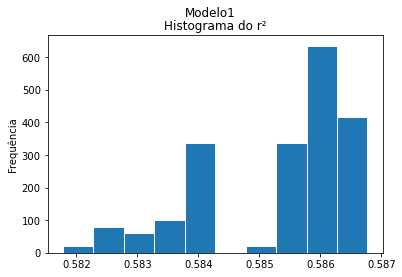

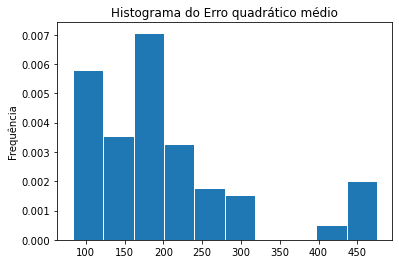

In [22]:
lista_r_quadrado_regressao_linear = []
erro_quadratico_medio_regressao_linear = []
for i in range(101):
    regr = LinearRegression()
    
    if i ==0:
        x_test = X[0:499]
        x_train = X[499:]
        y_test = Y[0:499]
        y_train = Y[499:]
    else:
        x_test = X[499*i:499*(i+1)]
        x_train1 = X[0:499*i-1]
        x_train2 = X[499*(i+1)+1:]
        x_train = pd.concat([x_train1, x_train2])
        y_test = Y[499*i:499*(i+1)]
        y_train1 = Y[0:499*i-1]
        y_train2 = Y[499*(i+1)+1:]
        y_train = pd.concat([y_train1, y_train2])
    
    X_sm_train = sm.add_constant(x_train)
    y_sm_train = sm.add_constant(y_train)
    X_sm_test = sm.add_constant(x_test)
    y_sm_test = sm.add_constant(y_test)
    
    regr.fit(X_sm_train, y_sm_train)
    y_pred = reg.predict(x_test)
    
    lista_r_quadrado_regressao_linear.append(regr.score(X_sm_train,y_sm_train))
    erro_quadratico_medio_regressao_linear.append(mean_squared_error(y_test,y_pred))
    
        
plt.hist(lista_r_quadrado_regressao_linear, edgecolor='white', density=True)
plt.suptitle('Modelo1')
plt.title('Histograma do r²')
plt.ylabel('Frequência')
plt.show()

plt.hist(erro_quadratico_medio_regressao_linear, edgecolor='white', density=True)
plt.title('Histograma do Erro quadrático médio')
plt.ylabel('Frequência')
plt.show()

#### Conclusão Regressão Linear Múltipla:

Observando os resultados do Modelo de Regressão linear múltipla, podemos observar que o percentual de acerto (o r^2), está com valor médio por volta de  de 0.5855, note que os gráficos acima foram gerados com 100 amostras diferentes , ou seja, em média o modelo acerta em 58.5% dos casos. Lembrando que quanto mais próximo de 1 (100%) for o r^2 , melhor é o modelo.
Outro valor que está sendo analisado é o erro quadrático médio que tem o seu valor variando entre  próximo de 120 até mais de 500, com a maior parte dos valores se concentrando no intervalo de 150 a 200, que são valores razoáveis. Por outro lado, percebemos um intervalo entre aproximadadamente 220 e 350 que não tem valores, isso se deve por conta da 100 amostras diferentes, o que mostra que teve amostrar com erros bem maiores que outras. Porém, os valores  do modelo até que são satisfatórios. Lembrando que o valor ideal para esse erro é zero.

### Random forest regression

Random Forest Regression é um algoritmo de aprendizado supervisionado que usa o método de aprendizado de conjunto para regressão. Como o próprio nome propõe, esse modelo se baseia em uma floresta aleatória “construída” por várias árvores de decisão, produzindo a média das classes como previsão de todas as árvores. 

A seguir temos uma imagem exemplificando como esse modelo funciona:


![Modelo_Regressao1](Modelo_Regressao1.png)

In [23]:
# Importando bibliotecas especifica para o modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
# Dividindo o dataframe em treinamento e teste
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [26]:
Y_pred = regressor.predict(X_test)
Y_pred # previsão

array([36.6 , 45.1 , 55.3 , ..., 48.1 , 45.2 , 38.85])

#### Qualidades de ajuste (R² e RMS):

In [27]:
# Percentual de acertos do modelo - r^2
r2_score(Y_test, Y_pred)

0.22716219744851107

In [28]:
# Erro quadrado medio
mean_squared_error(Y_test, Y_pred)

188.683519071199

#### Validação -  Rodando o modelo para 100 amostras diferentes:

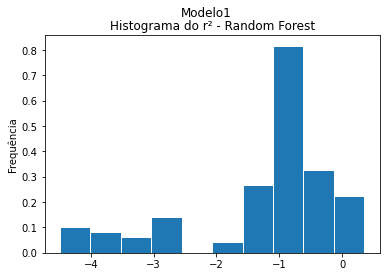

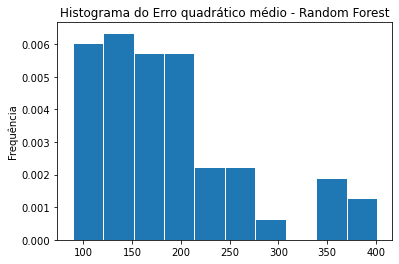

In [29]:
lista_r_quadrado_random_forest = []
erro_quadratico_medio_random_forest = []

X = dados[['danceability', 'energy', 'liveness', 'loudness', 'duration_s']]
Y = dados['popularity']

randomfor = RandomForestRegressor(n_estimators=10,random_state=0)

for i in range(101):
    
    if i ==0:
        x_test = X[0:499]
        x_train = X[499:]
        y_test = Y[0:499]
        y_train = Y[499:]
    else:
        x_test = X[499*i:499*(i+1)]
        x_train1 = X[0:499*i-1]
        x_train2 = X[499*(i+1)+1:]
        x_train = pd.concat([x_train1, x_train2])
        y_test = Y[499*i:499*(i+1)]
        y_train1 = Y[0:499*i-1]
        y_train2 = Y[499*(i+1)+1:]
        y_train = pd.concat([y_train1, y_train2])
    
    
    randomfor.fit(x_train,y_train)
    y_pred_randomfor = randomfor.predict(x_test)
    
    lista_r_quadrado_random_forest.append(r2_score(y_test, y_pred_randomfor))
    erro_quadratico_medio_random_forest.append(mean_squared_error(y_test, y_pred_randomfor))
    
     
plt.hist(lista_r_quadrado_random_forest, edgecolor='white', density=True)
plt.suptitle('Modelo2')
plt.title('Histograma do r² - Random Forest')
plt.ylabel('Frequência')
plt.show()

plt.hist(erro_quadratico_medio_random_forest, edgecolor='white', density=True)
plt.title('Histograma do Erro quadrático médio - Random Forest')
plt.ylabel('Frequência')
plt.show()

#### Conclusão Random Forest Regression:
Olhandos resultados do Modelo "Random Forest Regression", que considera varias árvores de decisões,o valor de R-quadrado está próximo de 0.227, 22.7%,esse resultado foi gerado considerando uma amostra específica, note que foi um valor abaixo do valor obtido no modelo de regressão.
Quando vamos analisar o gráfico que foi gerado com 100 amostras diferentes podemos perceber que o valor de R-quadrado está, em maior parte, ficando negativo, o que indica que o modelo não se encaixou muito bem na situação , ele está errando mais do que se a estimativa fosse a média.

O erro quadrático médio em sua maior parte tem um valor entre 400 e 600, um valor alto que é um ruim, porém  tem uma parte relevante que está entre 100 e 200 que é um valor baixo. Entretando, como o valor de R-quadrado está na casa dos negativos, mesmo tendo valores baixos de erro quadrático o modelo está muito ruim para fazer a predição da popularidade das músicas


### Regression tree

Ao contrário do modelo Random Forest Regression, o Regression Tree, faz algo semelhante, porém com apenas a análise detalhada de uma árvore. Para que isso seja possível essa árvore é dividida em ramos, nós e folhas, fazendo com que o modelo imponha uma série de perguntas, afunilando cada vez mais, para obter um resultado. 
Uma dúvida que pode surgir é de como essas perguntas são feitas. Basicamente essa árvore é classificada como um modelo de aprendizagem supervisionada. Assim, a árvore de decisão é capaz de fazer uma previsão percorrendo toda a árvore, fazendo perguntas verdadeiro / falso, até chegar a um nó folha. A previsão final é dada pela média do valor da variável dependente naquele nó folha.

![Modelo_Regressao2](Modelo_Regressao2.png)

In [31]:
# Importando bibliotecas especifica para o modelo
from sklearn.tree import DecisionTreeRegressor 

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [33]:
regressor= DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [34]:
Y_pred = regressor.predict(X_test)
Y_pred

array([60., 41., 40., ..., 13., 50., 47.])

#### Qualidades de ajuste (R² e RMS):

In [35]:
# Percentual de acertos do modelo - r^2
r2_score(Y_test, Y_pred)

-0.3946371908975248

In [36]:
# Erro quadrado medio
mean_squared_error(Y_test, Y_pred)

342.36654722222227

#### Validação -  Rodando o modelo para 100 amostras diferentes:

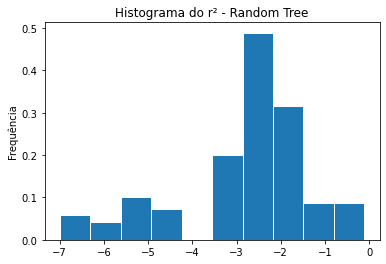

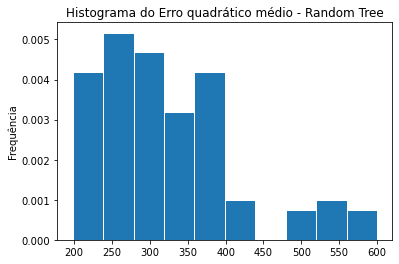

In [37]:
lista_r_quadrado_regression_tree = []
erro_quadratico_medio_regression_tree = []

X = dados[['danceability', 'energy', 'liveness', 'loudness', 'duration_s']]
Y = dados['popularity']

regrtree = DecisionTreeRegressor(random_state=0)

for i in range(101):
    
    if i ==0:
        x_test = X[0:499]
        x_train = X[499:]
        y_test = Y[0:499]
        y_train = Y[499:]
    else:
        x_test = X[499*i:499*(i+1)]
        x_train1 = X[0:499*i-1]
        x_train2 = X[499*(i+1)+1:]
        x_train = pd.concat([x_train1, x_train2])
        y_test = Y[499*i:499*(i+1)]
        y_train1 = Y[0:499*i-1]
        y_train2 = Y[499*(i+1)+1:]
        y_train = pd.concat([y_train1, y_train2])
    
    
    regrtree.fit(x_train,y_train)
    y_pred_tree = regrtree.predict(x_test)
    
    lista_r_quadrado_regression_tree.append(r2_score(y_test, y_pred_tree))
    erro_quadratico_medio_regression_tree.append(mean_squared_error(y_test, y_pred_tree))
   
        
plt.hist(lista_r_quadrado_regression_tree, edgecolor='white', density=True)
plt.suptitle('Modelo3')
plt.title('Histograma do r² - Random Tree')
plt.ylabel('Frequência')
plt.show()

plt.hist(erro_quadratico_medio_regression_tree, edgecolor='white', density=True)
plt.title('Histograma do Erro quadrático médio - Random Tree')
plt.ylabel('Frequência')
plt.show()

#### Conclusão Regression  Tree:
Olhandos resultados do Modelo "Regression tree", que considera apenas uma arvore, com uma amostra o R-quadrado está em -0.394, ou seja ele está errando mais do que se usasse a média como parâmetro nessa previsão.
O erro quadrático médio(RMS) que tem valor de apróximado de 342.36, que é pouco menos que o dobro da média dos modelos já vistos, o que significa que foi um resultado pior comparando.
Analisando os gráficos de R-quadrado e do erro quadrático médio com as 100 amostras diferentes podemos perceber que todas as amostras utilizadas ficaram com R-quadrado negativo, ou seja, esse modelo não é bom para ser utilizado na base dados escolhida. Alem disso os valores de RMS estão bastante espalhados e chegando na casa de 700, o que é muito alto comparado aos modelos anteriores reforçando que essa não é uma boa escolha


## Conclusão

### Comparando os modelos

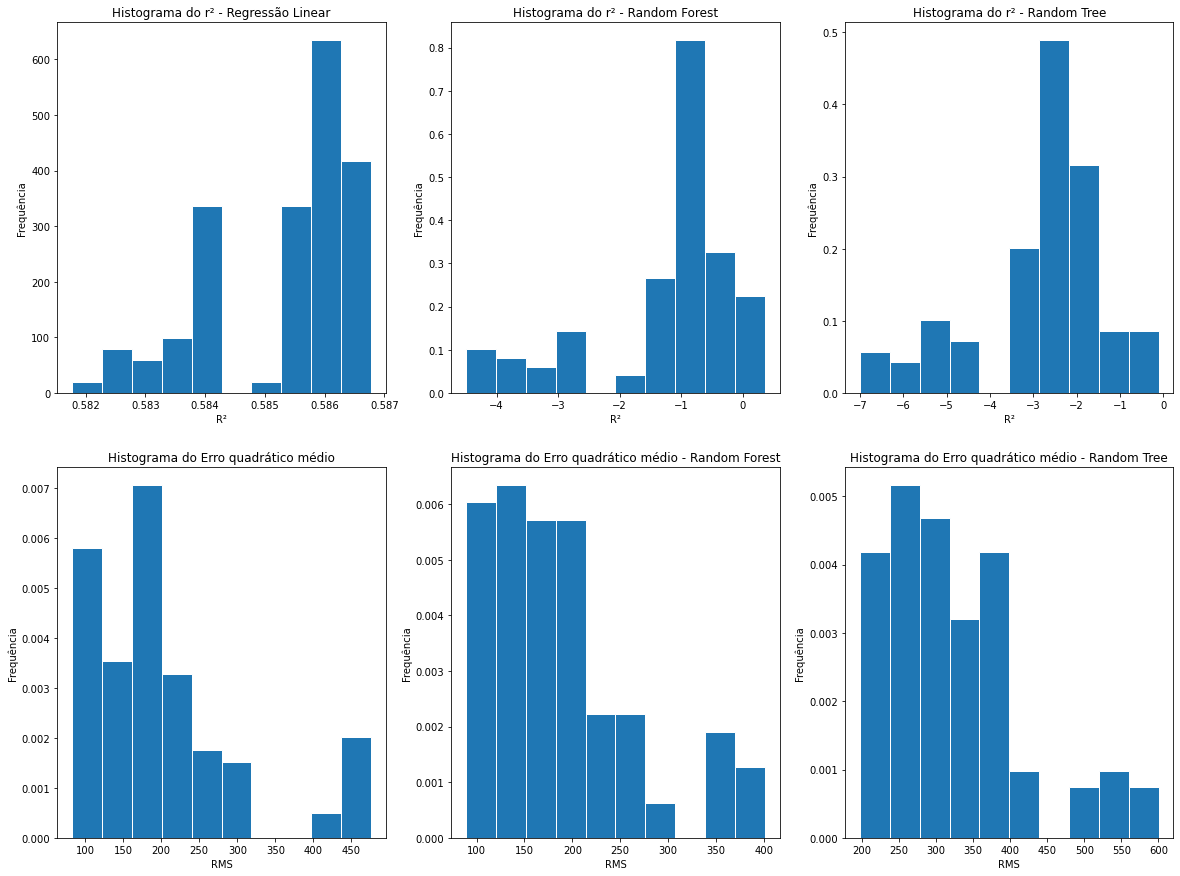

In [43]:
plt.figure(figsize=(20, 15))

plt.subplot(231)
plt.hist(lista_r_quadrado_regressao_linear, edgecolor='white', density=True)
plt.title('Histograma do r² - Regressão Linear')
plt.xlabel('R²')
plt.ylabel('Frequência')

plt.subplot(232)
plt.hist(lista_r_quadrado_random_forest, edgecolor='white', density=True)
plt.title('Histograma do r² - Random Forest')
plt.xlabel('R²')
plt.ylabel('Frequência')

plt.subplot(233)
plt.hist(lista_r_quadrado_regression_tree, edgecolor='white', density=True)
plt.title('Histograma do r² - Random Tree')
plt.xlabel('R²')
plt.ylabel('Frequência')

plt.subplot(234)
plt.hist(erro_quadratico_medio_regressao_linear, edgecolor='white', density=True)
plt.title('Histograma do Erro quadrático médio')
plt.xlabel('RMS')
plt.ylabel('Frequência')

plt.subplot(235)
plt.hist(erro_quadratico_medio_random_forest, edgecolor='white', density=True)
plt.title('Histograma do Erro quadrático médio - Random Forest')
plt.xlabel('RMS')
plt.ylabel('Frequência')

plt.subplot(236)
plt.hist(erro_quadratico_medio_regression_tree, edgecolor='white', density=True)
plt.title('Histograma do Erro quadrático médio - Random Tree')
plt.xlabel('RMS')
plt.ylabel('Frequência')
plt.show()

Então, após analisar todos os modelos, percebemos que os modelos de Random Forest e Tree Regression não desempenharam bem ao tentar realizar a predição, ficando com os valores de R-quadrado bem ruins, abaixos de 20% e com valores negativos. O melhor modelo dentro os utilizados foi a Regressão Linear Múltipla que teve uma acurácia média de 58% e RMS com um valor razoável.

Retomando nosso questionamento inicial (como a duração de uma música influencia em sua popularidade), percebemos que a relação entre duração e popularidade é muito fraca, ou seja, não há grande influência entre essas variáveis. Conclui-se então que seria inadequado tentar prever a popularidade de uma música baseado apenas em sua duração. Quando fizemos a regressão percebemos que as outras variáveis eram mais relevantes que a duração. Por isso, utilizamos as outras variáveis Features da base de dados para fazer os modelos preditivos de forma mais confiável. 

## Referências

https://www.kaggle.com/vicsuperman/prediction-of-music-genre

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
